# Import Programs and Data
## Pandas and Numpy

In [2]:
import pandas as pd
from dfply import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
events = pd.read_csv("Events.csv")
events['timestamp'] = events['Date'] + " " + events['Time']

## Groupby and Summarize Event Data

In [11]:
for i in events.columns:
    event_means = pd.DataFrame(events.groupby('Event').mean())
    event_maxs = pd.DataFrame(events.groupby('Event').max())
    event_mins = pd.DataFrame(events.groupby('Event').min())
    event_std = pd.DataFrame(events.groupby('Event').std())
    CoV = event_std/event_means
    QDOC = CoV.DOC.div(CoV.Q)
    QNO3 = CoV.NO3.div(CoV.Q)
    QDO = CoV.DO.div(CoV.Q)
    QpH = CoV.pH.div(CoV.Q)
    QSAC = CoV.SAC254.div(CoV.Q)
    DOCpH = CoV.pH.div(CoV.DOC)
    DOpH = CoV.pH.div(CoV.DO)
    DOCdo = CoV.DO.div(CoV.DOC)
    
    
    

In [21]:
event_num = range(1, 25)

CoVs = np.column_stack((event_num, QDOC, QNO3))
CoVs

array([[ 1.        ,  1.96214496,  0.36445266],
       [ 2.        ,  1.55883425,  0.65574672],
       [ 3.        ,  0.67541084,  0.40028615],
       [ 4.        ,  0.9958187 ,  0.47017439],
       [ 5.        ,  0.70197869,  0.9522194 ],
       [ 6.        ,  1.07946381,  0.81521222],
       [ 7.        ,  0.71940728,  0.83184757],
       [ 8.        ,  0.91618099,  0.69293722],
       [ 9.        ,  1.40748852,  1.0098334 ],
       [10.        ,  0.76663504,  0.87874618],
       [11.        ,  1.07838546,  0.76123779],
       [12.        ,  4.28102107,  1.32511533],
       [13.        ,  0.56069594,  0.30042098],
       [14.        ,  0.69534163,  0.2396622 ],
       [15.        ,  0.49410619,  0.72757604],
       [16.        ,  1.10229458,  2.26995932],
       [17.        ,  1.5727899 ,  1.74591267],
       [18.        ,  0.69393204,  1.7401099 ],
       [19.        ,  0.56926288,  1.000436  ],
       [20.        ,  0.94637472,  0.93639458],
       [21.        ,  0.57046427,  0.361

In [23]:
event_length = (pd.DataFrame(events.groupby('Event').count().Value)) / 6

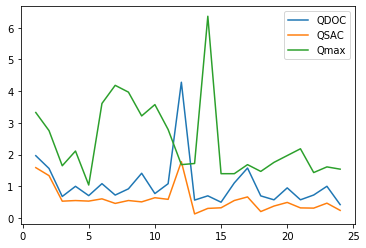

In [24]:
#### Combining Coefficient Arrays

event_number = range(1, 25)

stats_array = np.column_stack((event_number, QDOC, QSAC, QDO, QpH, DOCpH, DOpH, DOCdo))
stats_df = pd.DataFrame(stats_array, columns = ['event_number','QDOC', 'QSAC', 'QDO', 'QpH', 'DOCpH', 'DOpH', 'DOCdo'])

stats_df



#### Plotting Coefficients
plt.plot(event_number, QDOC, label = 'QDOC')
plt.plot(event_number, QSAC, label = 'QSAC')
plt.plot((event_maxs.Q)/10, label = 'Qmax')
plt.legend()

In [26]:
stats_df

,event_number,QDOC,QSAC,QDO,QpH,DOCpH,DOpH,DOCdo
0,1.0,1.962145,1.585056,1.513727,0.121386,0.061864,0.080190,0.771465
1,2.0,1.558834,1.332757,0.546914,0.109716,0.070383,0.200609,0.350848
2,3.0,0.675411,0.526730,0.507142,0.109683,0.162395,0.216278,0.750864
3,4.0,0.995819,0.546628,0.652205,0.045051,0.045240,0.069075,0.654944
4,5.0,0.701979,0.528903,1.877697,0.057754,0.082273,0.030758,2.674863
5,6.0,1.079464,0.600519,0.196264,0.068182,0.063163,0.347400,0.181816
6,7.0,0.719407,0.456232,0.083223,0.077187,0.107293,0.927475,0.115683
7,8.0,0.916181,0.547298,0.224656,0.099053,0.108115,0.440907,0.245210
8,9.0,1.407489,0.504650,0.542889,0.151780,0.107838,0.279579,0.385715
9,10.0,0.766635,0.635805,0.253433,0.077440,0.101013,0.305565,0.330579


## Calculate Time of Event Maxs/Mins

Text(0, 0.5, 'Hours Till Most Extreme Value')

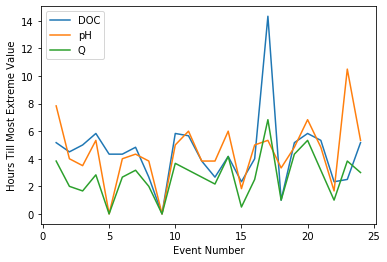

In [27]:
Time_Max_Q = ((events.groupby('Event').Q.idxmax(axis=1) + 1) - np.array(events.groupby('Event').Value.min())) / 6
Time_Max_DOC = ((events.groupby('Event').DOC.idxmax(axis=1) + 1) - np.array(events.groupby('Event').Value.min())) / 6
Time_Min_pH = ((events.groupby('Event').pH.idxmin(axis=1) + 1) - np.array(events.groupby('Event').Value.min())) / 6
Time_Min_DO = ((events.groupby('Event').DO.idxmin(axis=1) + 1) - np.array(events.groupby('Event').Value.min())) / 6

event_number = range(1, 25)
time_stack = np.column_stack((event_number, Time_Max_Q, Time_Max_DOC, Time_Min_pH, Time_Min_DO))
time = pd.DataFrame(time_stack, columns = ['event_number','Q', 'DOC', 'pH', 'DO'])

plt.plot(event_number, Time_Max_DOC, label = "DOC")
plt.plot(event_number, Time_Min_pH, label = "pH")
plt.plot(event_number, Time_Max_Q, label = "Q")
plt.legend(loc="upper left")
plt.xlabel("Event Number")
plt.ylabel("Hours Till Most Extreme Value")

## Event Timings

In [28]:
DOC_delay = np.array(time.DOC)
pH_delay = np.array(time.pH)

time_peak = np.column_stack((event_number, event_length, DOC_delay, pH_delay))
event_timings = pd.DataFrame(time_peak, columns = ['event_number', 'event_length','DOC', 'pH'])



## Event Data Normalisation

In [29]:
def event_norm(number_of_event):
    
    event = events[(events.Event == number_of_event)]
    for i in event.columns:
        
        time = event.timestamp
        DOCnorm = event.DOC.apply(lambda x: (x - event.DOC.min())/(event.DOC.max() - event.DOC.min()))
        Qnorm = event.Q.apply(lambda x: (x - event.Q.min())/(event.Q.max() - event.Q.min()))
        pHnorm = event.pH.apply(lambda x: (x - event.pH.min())/(event.pH.max() - event.pH.min()))
        SACnorm = event.SAC254.apply(lambda x: (x - event.SAC254.min())/(event.SAC254.max() - event.SAC254.min()))
    
#plot Hysteresis Graph and Time Series Graph    
    
    plot1 = plt.figure(1)
    plt.plot(Qnorm, DOCnorm, "-g", label = 'DOC')
    plt.plot(Qnorm, pHnorm, "-c", label = 'pH')
    plt.plot(Qnorm, SACnorm, "-m", label = '254' )
    plt.yticks([])
    plt.legend()
    plt.title('Event Hysteresis')
    plt.xlabel('Discharge')

    hydrograph = plt.figure(2)
    plt.plot(Qnorm, time, "-b", label = 'Q')
    plt.plot(DOCnorm, time, "-g", label = 'DOC')
    plt.plot(pHnorm, time, "-c", label = 'pH')
    plt.plot(SACnorm, time, "-m", label = '254')
    plt.yticks([])
    plt.legend()
    plt.title('Time Series')
    

    plt.show()
        
    

Text(0, 0.5, 'Time till Extreme')

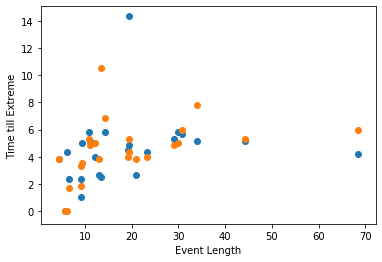

In [30]:
plt.scatter(event_timings.event_length, event_timings.DOC)
plt.scatter(event_timings.event_length, event_timings.pH)
plt.xlabel('Event Length')
plt.ylabel('Time till Extreme')


In [31]:
event_timings

,event_number,event_length,DOC,pH
0,1.0,34.000000,5.166667,7.833333
1,2.0,19.333333,4.500000,4.000000
2,3.0,9.500000,5.000000,3.500000
3,4.0,10.833333,5.833333,5.333333
4,5.0,6.166667,4.333333,0.000000
5,6.0,23.333333,4.333333,4.000000
6,7.0,19.500000,4.833333,4.333333
7,8.0,21.000000,2.666667,3.833333
8,9.0,5.666667,0.000000,0.000000
9,10.0,29.833333,5.833333,5.000000


## Pick Event To View Graphs

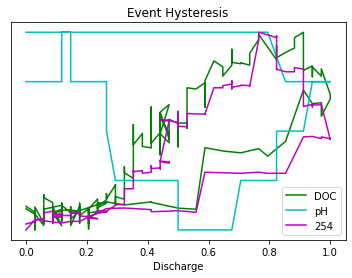

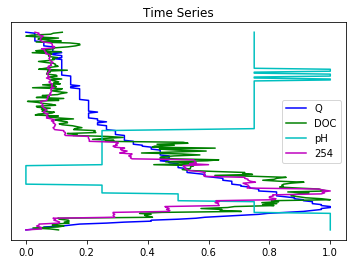

In [32]:
event_norm(1)

In [44]:
def timeseries(event):
    plt.plot((events[events.Event == event].timestamp), (events[events.Event == event].DOC), "-g", label = 'DOC')
    plt.plot((events[events.Event == event].timestamp), (events[events.Event == event].Q), "-b", label = 'Q')
    plt.plot((events[events.Event == event].timestamp), (events[events.Event == event].NO3), "-r", label = 'NO3')
    plt.xticks([])
    plt.xlabel('Time')
    plt.legend()
    plt.ylim(0,25)
    

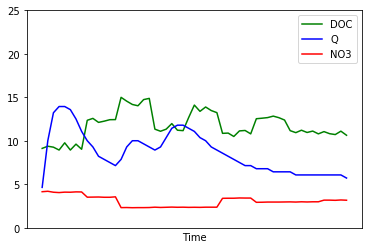

In [47]:
timeseries(15)

In [40]:
CoVs

array([[ 1.        ,  1.96214496,  0.36445266],
       [ 2.        ,  1.55883425,  0.65574672],
       [ 3.        ,  0.67541084,  0.40028615],
       [ 4.        ,  0.9958187 ,  0.47017439],
       [ 5.        ,  0.70197869,  0.9522194 ],
       [ 6.        ,  1.07946381,  0.81521222],
       [ 7.        ,  0.71940728,  0.83184757],
       [ 8.        ,  0.91618099,  0.69293722],
       [ 9.        ,  1.40748852,  1.0098334 ],
       [10.        ,  0.76663504,  0.87874618],
       [11.        ,  1.07838546,  0.76123779],
       [12.        ,  4.28102107,  1.32511533],
       [13.        ,  0.56069594,  0.30042098],
       [14.        ,  0.69534163,  0.2396622 ],
       [15.        ,  0.49410619,  0.72757604],
       [16.        ,  1.10229458,  2.26995932],
       [17.        ,  1.5727899 ,  1.74591267],
       [18.        ,  0.69393204,  1.7401099 ],
       [19.        ,  0.56926288,  1.000436  ],
       [20.        ,  0.94637472,  0.93639458],
       [21.        ,  0.57046427,  0.361

In [39]:
time_of_max_q = ((events.groupby('Event').Q.idxmax(axis=1) + 1))

In [576]:
time_of_max_q

Event
1       24
2      217
3      331
4      395
5      443
6      496
7      639
8      749
9      863
10     919
11    1095
12    1277
13    1301
14    1391
15    1779
16    1846
17    1945
18    2027
19    2102
20    2174
21    2247
22    2408
23    2465
24    2541
Name: Q, dtype: int64